In [1]:
import pandas as pd
import datasets

/home/kooler/dev/sw/sns-fake-content/model/training/transformer/env_transformer/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_xl = datasets.load_from_disk("./training/transformer/data/fnn_xl/")

In [3]:
df_xl = pd.concat([data_xl['train'].to_pandas(), data_xl['test'].to_pandas(), data_xl['validation'].to_pandas()]).reset_index(drop=True)
df_xl['processed_text'] = df_xl['text'].apply(lambda x: x.split(' '))
df_xl.head()

,text,label,__index_level_0__,processed_text
0,What's Really Going on Between Scott Disick an...,1,4294,"[What's, Really, Going, on, Between, Scott, Di..."
1,@IanBouillion ya but you're way more interesti...,0,189163,"[@IanBouillion, ya, but, you're, way, more, in..."
2,*kourtney kardashian voice* literally mom you’...,0,49350,"[*kourtney, kardashian, voice*, literally, mom..."
3,Tonight we are awarding Sustainable Nation Ire...,0,98271,"[Tonight, we, are, awarding, Sustainable, Nati..."
4,7/23/18: White House Press Briefing - The Tim...,1,1227617,"[7/23/18:, White, House, Press, Briefing, -, ,..."


In [4]:
df_xl

,text,label,__index_level_0__,processed_text
0,What's Really Going on Between Scott Disick an...,1,4294,"[What's, Really, Going, on, Between, Scott, Di..."
1,@IanBouillion ya but you're way more interesti...,0,189163,"[@IanBouillion, ya, but, you're, way, more, in..."
2,*kourtney kardashian voice* literally mom you’...,0,49350,"[*kourtney, kardashian, voice*, literally, mom..."
3,Tonight we are awarding Sustainable Nation Ire...,0,98271,"[Tonight, we, are, awarding, Sustainable, Nati..."
4,7/23/18: White House Press Briefing - The Tim...,1,1227617,"[7/23/18:, White, House, Press, Briefing, -, ,..."
...,...,...,...,...
1368182,Total Bellas Recap: The Family Takes a Trip to...,1,1123,"[Total, Bellas, Recap:, The, Family, Takes, a,..."
1368183,Fall out boys and wiz concert and trey songs ...,0,1332791,"[Fall, out, boys, and, wiz, concert, , and, tr..."
1368184,@FoxBusiness @Jim_Jordan NOW you're going to s...,1,158843,"[@FoxBusiness, @Jim_Jordan, NOW, you're, going..."
1368185,@dutkae Flip or Flop Katy?,0,208559,"[@dutkae, Flip, or, Flop, Katy?]"


In [5]:
print(1, len(list(filter(lambda x: x == 1, df_xl['label']))))
print(0, len(list(filter(lambda x: x == 0, df_xl['label']))))

1 932369
0 435818


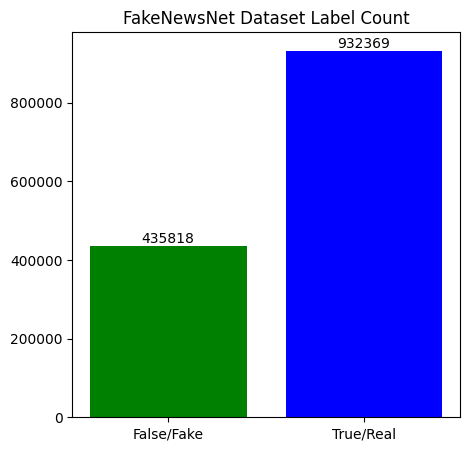

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# example dataframe
false_count = len(list(filter(lambda x: x == 0, df_xl["label"])))
true_count = len(list(filter(lambda x: x == 1, df_xl["label"])))

fig = plt.figure(figsize=(5, 5))

# creating the bar plot
plt.bar(
    ["False/Fake", "True/Real"], [false_count, true_count], color=['g', "b"]
)
# plot count into bar label
plt.bar_label(plt.gca().containers[0], fmt="%d")
plt.title("FakeNewsNet Dataset Label Count")
plt.savefig('plt/FakeNewsNet_bar.png')

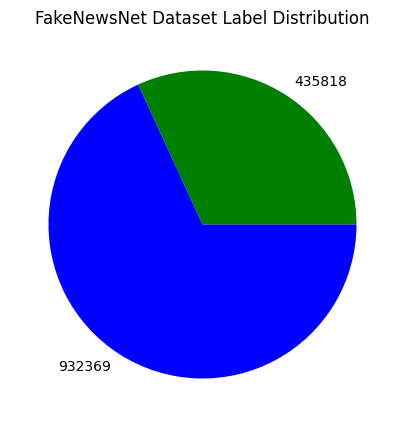

In [7]:
# Create pie chart with labels
fit = plt.figure(figsize=(5, 5))

plt.pie([false_count, true_count], labels=[false_count, true_count], colors=['g', "b"])

plt.title("FakeNewsNet Dataset Label Distribution")
plt.savefig('plt/FakeNewsNet_pie.png')

In [8]:
text_length = map(len, df_xl['processed_text'])
average_text_count = sum(text_length) / len(df_xl['processed_text'])

In [9]:
df_xl['text'][0]

"What's Really Going on Between Scott Disick and Sofia Richie? Inside Their &amp;quot;Inseparable&amp;quot; Relationship "

In [10]:
text_length = list(map(len, df_xl['processed_text']))

In [11]:
import seaborn as sns
import numpy as np

In [12]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
reject_outliers(np.array(text_length))

array([15, 11, 12, ..., 25,  5, 20])

<Figure size 500x600 with 0 Axes>

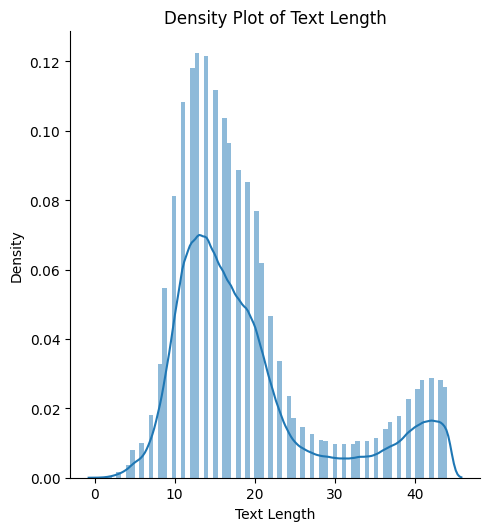

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

fit = plt.figure(figsize=(5, 6))

# Plot density of data
sns.displot(reject_outliers(np.array(text_length)), kind="kde")
plt.hist(reject_outliers(np.array(text_length)), bins=75, density=True, alpha=0.5)
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.title('Density Plot of Text Length')
# plt.show()
plt.savefig('plt/FakeNewsNet_den_text_length.png')